### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

## Load dataset

In [2]:
housing=pd.read_csv(r"C:\Users\gadda\OneDrive\Desktop\House_price_predictions\Dataset\AmesHousing.csv")
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Overview

In [3]:
housing.shape

(2930, 82)

In [4]:
housing.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Exploring Data Analysis

## Checking missing values

In [6]:
housing.isnull().sum().sort_values(ascending=False)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
                  ... 
Mo Sold              0
Yr Sold              0
Sale Type            0
Sale Condition       0
SalePrice            0
Length: 82, dtype: int64

## Exploring target variable

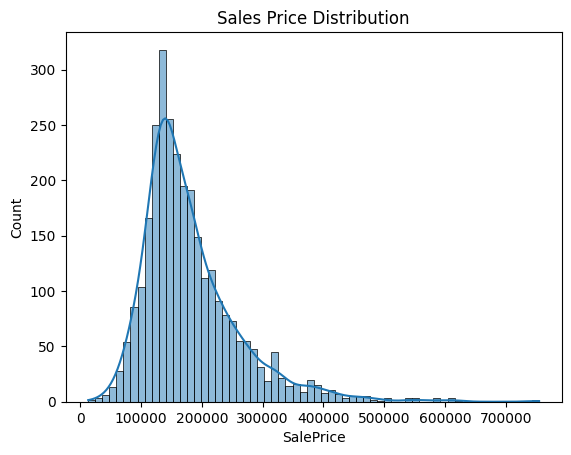

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
sns.histplot(housing['SalePrice'],kde=True)
plt.title("Sales Price Distribution")
plt.show()

housing['SalePrice'].describe()

## Explore Categorgical Values

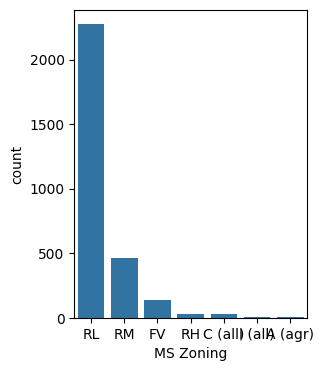

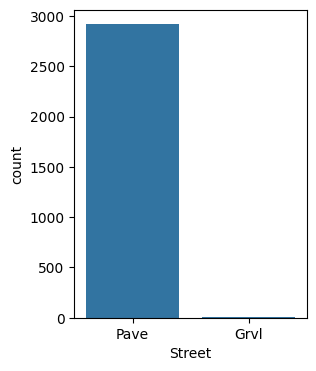

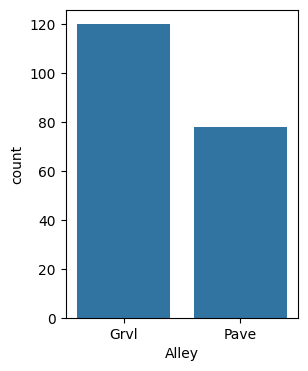

In [8]:
categorical_col=housing.select_dtypes(include=['object']).columns
for col in categorical_col[:3]:
    plt.figure(figsize=(3,4))
    sns.countplot(data=housing,x=col,order=housing[col].value_counts().index)
    plt.show()

## Exploring numerical values

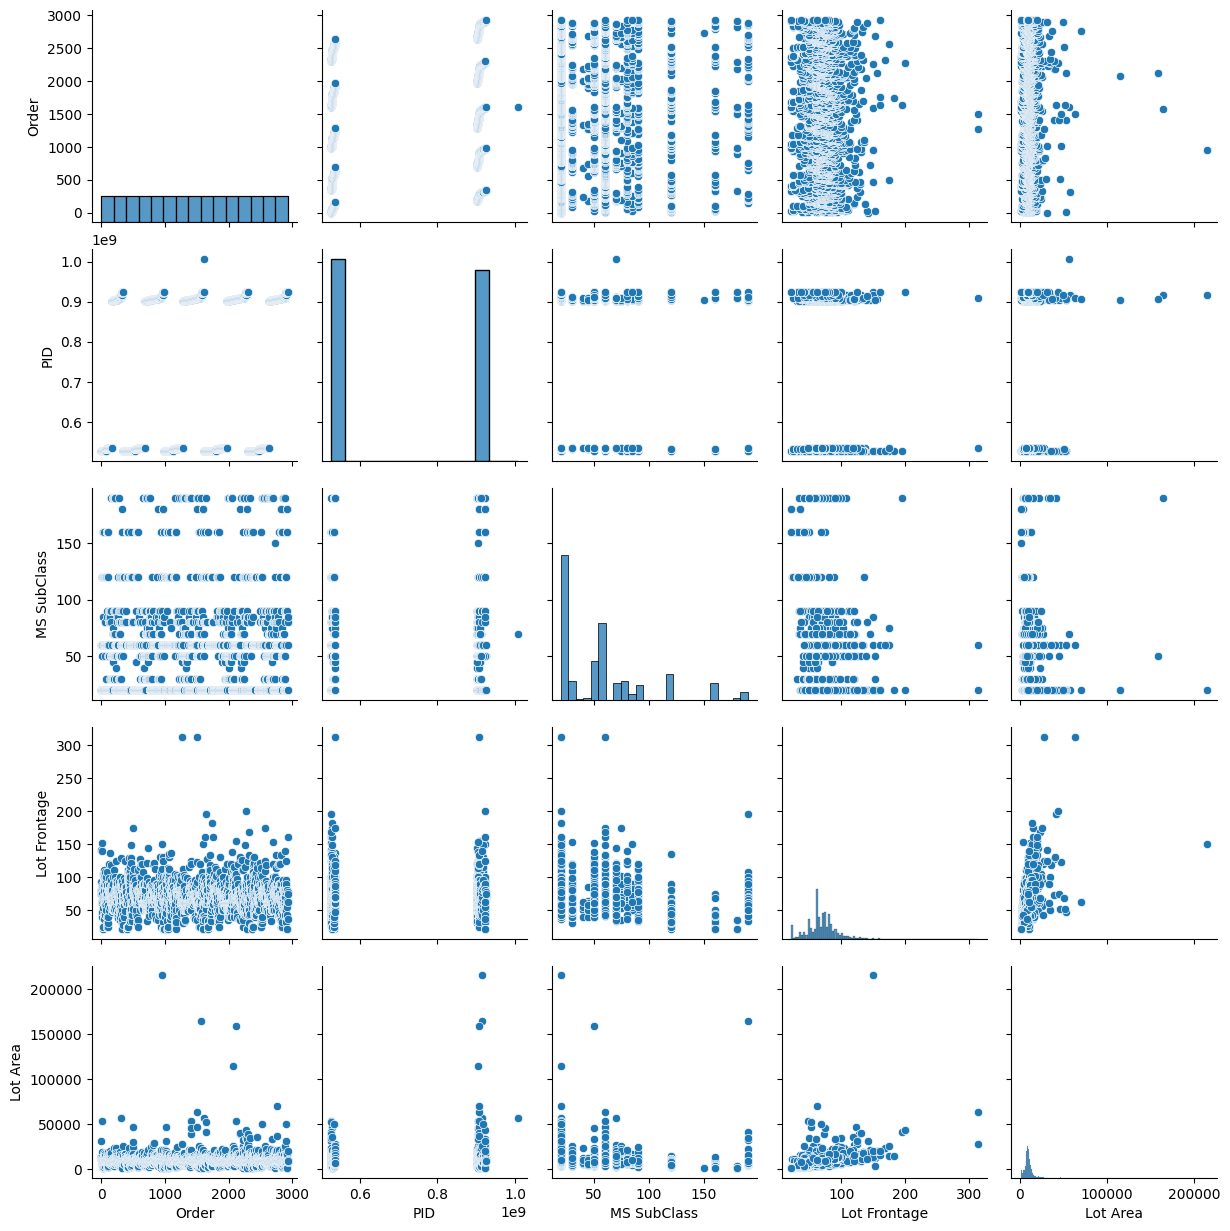

In [9]:
numerical_col=housing.select_dtypes(include=['int64','float64']).columns
sns.pairplot(housing[numerical_col[:5]])
plt.show()



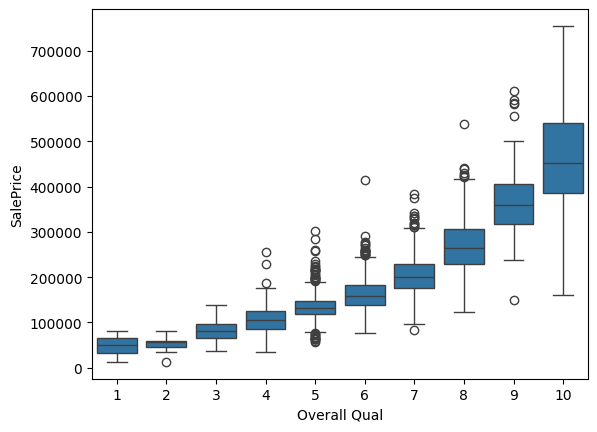

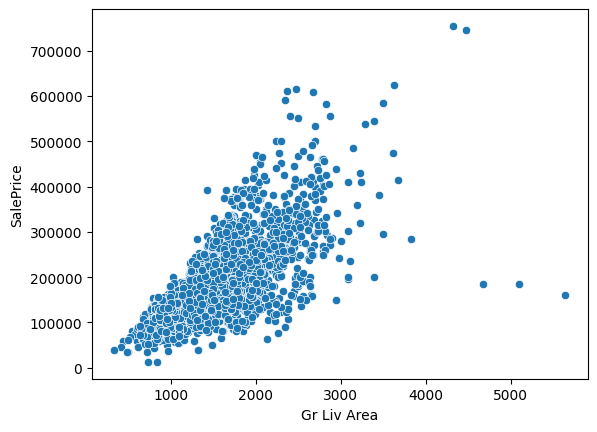

In [10]:
sns.boxplot(x='Overall Qual', y='SalePrice', data=housing)
plt.show()

# GrLivArea vs SalePrice
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=housing)
plt.show()

## Data cleaning and Feature Engineering

### Handling missing values

In [11]:
#drop columns where missng values more than 50% of total
missing=housing.isnull().sum()
missing_percent=(missing/len(housing))*100
column_to_drop=missing_percent[missing_percent>50].index


In [12]:
housing.drop(column_to_drop,axis=1,inplace=True)

In [13]:
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [14]:
numerical_col1=housing.select_dtypes(include=['int64','float64']).columns
categorical_col1=housing.select_dtypes(include=['object']).columns

In [15]:
numer=SimpleImputer(strategy='median')
cate=SimpleImputer(strategy='most_frequent')

imputed_numer=pd.DataFrame(numer.fit_transform(housing[numerical_col1]),columns=numerical_col1)
imputed_cate=pd.DataFrame(cate.fit_transform(housing[categorical_col1]),columns=categorical_col1)

In [16]:

imputed_numer.columns = housing[numerical_col1].columns
imputed_cate.columns = housing[categorical_col1].columns
housing_imputed = pd.concat([imputed_numer, imputed_cate], axis=1)

In [17]:
for col in housing_imputed.columns:
    housing[col]=housing_imputed[col]

In [18]:
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1.0,526301100.0,20.0,RL,141.0,31770.0,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,WD,Normal,215000.0
1,2.0,526350040.0,20.0,RH,80.0,11622.0,Pave,Reg,Lvl,AllPub,...,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,WD,Normal,105000.0
2,3.0,526351010.0,20.0,RL,81.0,14267.0,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,WD,Normal,172000.0
3,4.0,526353030.0,20.0,RL,93.0,11160.0,Pave,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal,244000.0
4,5.0,527105010.0,60.0,RL,74.0,13830.0,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Normal,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926.0,923275080.0,80.0,RL,37.0,7937.0,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,3.0,2006.0,WD,Normal,142500.0
2926,2927.0,923276100.0,20.0,RL,68.0,8885.0,Pave,IR1,Low,AllPub,...,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,WD,Normal,131000.0
2927,2928.0,923400125.0,85.0,RL,62.0,10441.0,Pave,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,WD,Normal,132000.0
2928,2929.0,924100070.0,20.0,RL,77.0,10010.0,Pave,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,WD,Normal,170000.0


In [19]:
ordinal_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual',
                'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual',
                'Garage Cond', 'Land Slope', 'Lot Shape', 'Utilities', 'Paved Drive']

ordinal_en=OrdinalEncoder()
housing[ordinal_cols]=ordinal_en.fit_transform(housing[ordinal_cols])


## Investigating Cardinality

In [20]:
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1.0,526301100.0,20.0,RL,141.0,31770.0,Pave,0.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,WD,Normal,215000.0
1,2.0,526350040.0,20.0,RH,80.0,11622.0,Pave,3.0,Lvl,0.0,...,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,WD,Normal,105000.0
2,3.0,526351010.0,20.0,RL,81.0,14267.0,Pave,0.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,WD,Normal,172000.0
3,4.0,526353030.0,20.0,RL,93.0,11160.0,Pave,3.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal,244000.0
4,5.0,527105010.0,60.0,RL,74.0,13830.0,Pave,0.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Normal,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926.0,923275080.0,80.0,RL,37.0,7937.0,Pave,0.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2006.0,WD,Normal,142500.0
2926,2927.0,923276100.0,20.0,RL,68.0,8885.0,Pave,0.0,Low,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,WD,Normal,131000.0
2927,2928.0,923400125.0,85.0,RL,62.0,10441.0,Pave,3.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,WD,Normal,132000.0
2928,2929.0,924100070.0,20.0,RL,77.0,10010.0,Pave,3.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,WD,Normal,170000.0


In [21]:
# Get number of unique entries in each column with categorical data
nominal_cols1 = ['MS Zoning', 'Street', 'Land Contour', 'Lot Config',
                'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
                'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                'Exterior 2nd', 'Foundation', 'Heating', 'Central Air',
                'Electrical', 'Garage Type', 'Sale Type', 'Sale Condition']
object_nunique = list(map(lambda col: housing[col].nunique(), nominal_cols1))

d = dict(zip(nominal_cols1, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Central Air', 2),
 ('Land Contour', 4),
 ('Lot Config', 5),
 ('Bldg Type', 5),
 ('Electrical', 5),
 ('Roof Style', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Garage Type', 6),
 ('Sale Condition', 6),
 ('MS Zoning', 7),
 ('Condition 2', 8),
 ('House Style', 8),
 ('Roof Matl', 8),
 ('Condition 1', 9),
 ('Sale Type', 10),
 ('Exterior 1st', 16),
 ('Exterior 2nd', 17),
 ('Neighborhood', 28)]

In [22]:
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1.0,526301100.0,20.0,RL,141.0,31770.0,Pave,0.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,WD,Normal,215000.0
1,2.0,526350040.0,20.0,RH,80.0,11622.0,Pave,3.0,Lvl,0.0,...,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,WD,Normal,105000.0
2,3.0,526351010.0,20.0,RL,81.0,14267.0,Pave,0.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,WD,Normal,172000.0
3,4.0,526353030.0,20.0,RL,93.0,11160.0,Pave,3.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal,244000.0
4,5.0,527105010.0,60.0,RL,74.0,13830.0,Pave,0.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Normal,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926.0,923275080.0,80.0,RL,37.0,7937.0,Pave,0.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2006.0,WD,Normal,142500.0
2926,2927.0,923276100.0,20.0,RL,68.0,8885.0,Pave,0.0,Low,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,WD,Normal,131000.0
2927,2928.0,923400125.0,85.0,RL,62.0,10441.0,Pave,3.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,WD,Normal,132000.0
2928,2929.0,924100070.0,20.0,RL,77.0,10010.0,Pave,3.0,Lvl,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,WD,Normal,170000.0


In [23]:
# drop columns with carndinality number >100
high_cardinality_cols=[col for col in nominal_cols1  if housing[col].nunique()>20 ]
low_cardinality_cols = [col for col in nominal_cols1 if col not in high_cardinality_cols]

housing.drop(columns=high_cardinality_cols,inplace=True)
high_cardinality_cols

['Neighborhood']

In [24]:
housing.SalePrice

low_cardinality_cols

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air',
 'Electrical',
 'Garage Type',
 'Sale Type',
 'Sale Condition']

In [25]:
#OneHotEncoding
Onehot_en=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
nominal_encoded=Onehot_en.fit_transform(housing[low_cardinality_cols])

Onehot_col=Onehot_en.get_feature_names_out(low_cardinality_cols)

nominal_en=pd.DataFrame(nominal_encoded,columns=Onehot_col,index=housing.index)

In [26]:
nominal_en

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2926,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2927,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2928,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
#concat the dataframe to orginal dataset
housing.drop(columns=low_cardinality_cols,inplace=True)

In [28]:
housing_updated=pd.concat([housing,nominal_en],axis=1)

## Splitting data

In [29]:
X=housing_updated.drop(columns=['SalePrice'])
y=housing_updated['SalePrice']

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=20,random_state=0)

In [31]:
X_train.shape

(2910, 192)

## Model Training

### Linear Regression

In [32]:
# Initialize model
lr_model=LinearRegression()
# Train model
lr_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## RandomForest Regression

In [33]:
# Initialize model
rf_model=RandomForestRegressor(n_estimators=100,random_state=0)
# Train model
rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Gradient Boosting Regression

In [34]:

# Initialize model
gbr = GradientBoostingRegressor(
    n_estimators=300,      # number of trees
    learning_rate=0.05,    # smaller values => slower but more accurate learning
    max_depth=4,           # tree depth
    random_state=42
)

# Train the model
gbr.fit(X_train, Y_train)


,loss,'squared_error'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


## Model Evaluation

In [35]:

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

# Linear Regression Evaluation
rmse_lr = np.sqrt(mean_squared_error(Y_test, y_pred_lr))
r2_lr = r2_score(Y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R²:", r2_lr)

# Random Forest Evaluation
rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf))
r2_rf = r2_score(Y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)

# Evaluate Gradient boosting
rmse_gbr = np.sqrt(mean_squared_error(Y_test, y_pred_gbr))
r2_gbr = r2_score(Y_test, y_pred_gbr)

print(f"Gradient Boosting RMSE: {rmse_gbr}")
print(f"Gradient Boosting R²: {r2_gbr}")


Linear Regression RMSE: 14529.591052711916
Linear Regression R²: 0.9435354589370157
Random Forest RMSE: 14926.343191076476
Random Forest R²: 0.94040965957206
Gradient Boosting RMSE: 14253.191212245976
Gradient Boosting R²: 0.9456633019381298


## Model performance Comparision

In [37]:
model= ['Linear Regression', 'Random Forest', 'Gradient Boosting']
rmse = [rmse_lr, rmse_rf,rmse_gbr]
r2 = [r2_lr, r2_rf, r2_gbr]

result=pd.DataFrame({'models':model,'RMSE':rmse,'R2_score':r2})

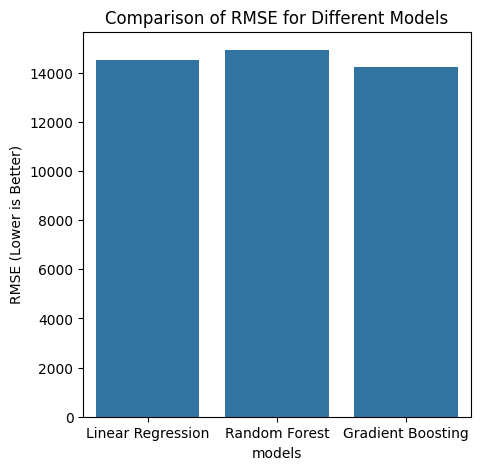

In [45]:
plt.figure(figsize=(5,5))
sns.barplot(x='models',y='RMSE',data=result)
plt.title('Comparison of RMSE for Different Models')
plt.ylabel('RMSE (Lower is Better)')
plt.show()

C:\Users\gadda\AppData\Local\Temp\ipykernel_13284\1039644462.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='models', y='R2_score', data=result, palette='magma')


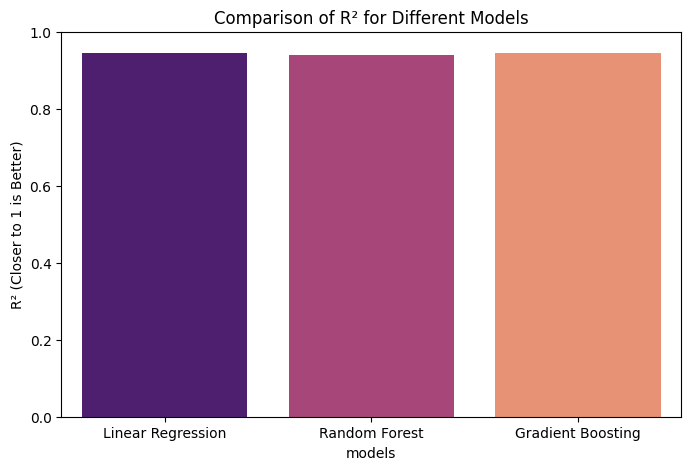

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='models', y='R2_score', data=result, palette='magma')
plt.title('Comparison of R² for Different Models')
plt.ylabel('R² (Closer to 1 is Better)')
plt.ylim(0,1)
plt.show()

## SAVE MODEL 

In [49]:
import joblib

In [58]:
# Save Linear Regression model
joblib.dump(lr_model, r'C:\Users\gadda\OneDrive\Desktop\House_price_predictions\Models\linear_regression_model.pkl')

['C:\\Users\\gadda\\OneDrive\\Desktop\\House_price_predictions\\Models\\linear_regression_model.pkl']

In [59]:
# Save Random Forest model
joblib.dump(rf_model, r'C:\Users\gadda\OneDrive\Desktop\House_price_predictions\Models\RandomForest_Regression_model.pkl')

['C:\\Users\\gadda\\OneDrive\\Desktop\\House_price_predictions\\Models\\RandomForest_Regression_model.pkl']

In [54]:
# Save Linear Regression model
joblib.dump(gbr, '')


['GradientBoosting_regression_model.pkl']